In [1]:
# descomenta y corre esta celda para instalar tensorflow
#%pip install tensorflow -qq

In [2]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\intro_machine_learning\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8469 - loss: 0.5315 - val_accuracy: 0.9550 - val_loss: 0.1633
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9517 - loss: 0.1704 - val_accuracy: 0.9652 - val_loss: 0.1202
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9627 - loss: 0.1243 - val_accuracy: 0.9719 - val_loss: 0.0987
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9718 - loss: 0.0971 - val_accuracy: 0.9746 - val_loss: 0.0870
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0811 - val_accuracy: 0.9758 - val_loss: 0.0808
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9784 - loss: 0.0678 - val_accuracy: 0.9765 - val_loss: 0.0818
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0605 - val_accuracy: 0.9770 - val_loss: 0.0769
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0554 - 

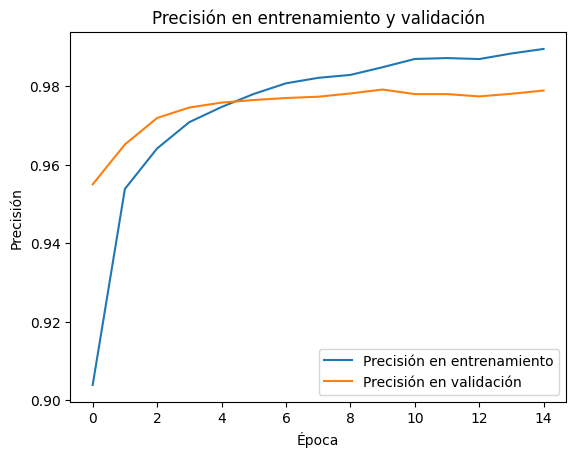

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



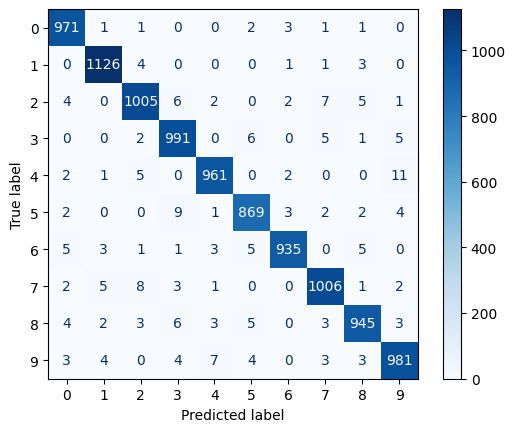

In [3]:

# Cargar el dataset MNIST
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
# Normalizamos los valores de los píxeles (0 a 255) a valores entre 0 y 1
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Dividimos los datos de entrenamiento en un conjunto de entrenamiento y uno de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Aplanamos las imágenes de 28x28 en vectores de 784 elementos
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Codificar las etiquetas en formato one-hot
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Definir una red neuronal densa básica
def create_basic_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo básico
model = create_basic_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Visualizar los resultados
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Reporte de clasificación y matriz de confusión
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
plt.show()
